In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from olist.seller import Seller
from olist.data import Olist

data = Olist().get_data()
df_seller = Seller().get_training_data()

def agg(scores):
    return sum((np.array(scores) == 1) * 100) + sum((np.array(scores) == 2) * 50) + sum((np.array(scores) == 3) * 40)

# know how much each seller cost
it_cost = 500_000
avg_it_cost = it_cost / data['orders'].shape[0]


## Merge the order_items table with order_reviews
df_order_items_reviews = data['order_items'].merge(data['order_reviews'], on ='order_id')
df_order_items_reviews

## Group by seller and order_id to get mean of the reviews
# df_grouped = df_order_items_reviews.groupby(['seller_id', 'order_id']).last()

# df_grouped['review_score'] = df_grouped['review_score'].apply(round)
# df_grouped['review_score'].value_counts()

# ## Apply the cost function on the grouped dataframe
# df_grouped['review_cost'] = df_grouped['review_score'].map({1:100, 2:50, 3:40, 4:0 , 5:0}) 
# df_grouped
## We merge the review cost table per seller with training seller table
df_seller_cost = df_order_items_reviews.groupby(['seller_id']).agg({'review_score': agg}).rename(columns = {'review_score': 'cost_of_bad_reviews'})
df_seller_cost = df_seller_cost.reset_index()

df_final_dataset = df_seller.merge(df_seller_cost, on ='seller_id')
df_final_dataset['avg_it_cost'] = round( df_final_dataset['n_orders'] * avg_it_cost, 2)
## Calculate the revenue
df_final_dataset['revenue'] = round( df_final_dataset['months_on_olist'] * 80 + df_final_dataset['sales'] * 0.1, 2)
## Calculate the profit
df_final_dataset['profit'] = round( df_final_dataset['revenue'] - (df_final_dataset['cost_of_bad_reviews'] + df_final_dataset['avg_it_cost']) , 2)
df = df_final_dataset

In [4]:
net_profit_margin_ratio = ( df.revenue.sum() - df.cost_of_bad_reviews.sum() - df.avg_it_cost.sum() ) / df.revenue.sum()

net_profit_margin_ratio.round(2)

0.11

# Sellers profit

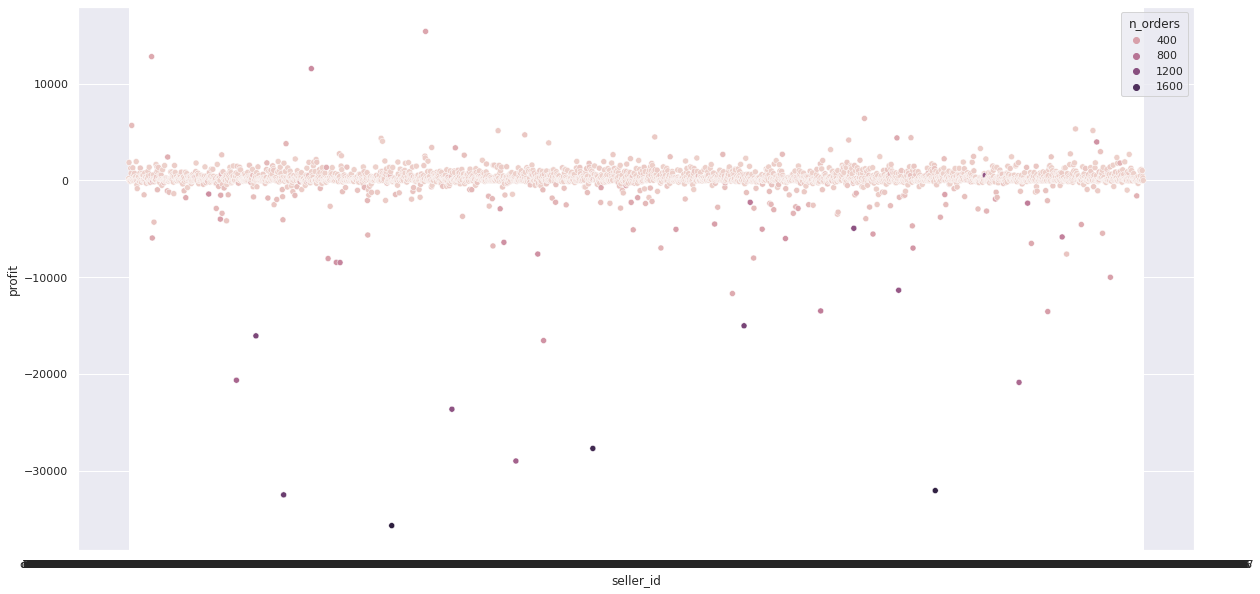

In [11]:
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(y=df.profit, x=df.seller_id, hue=df.n_orders);


# Dataset correlation

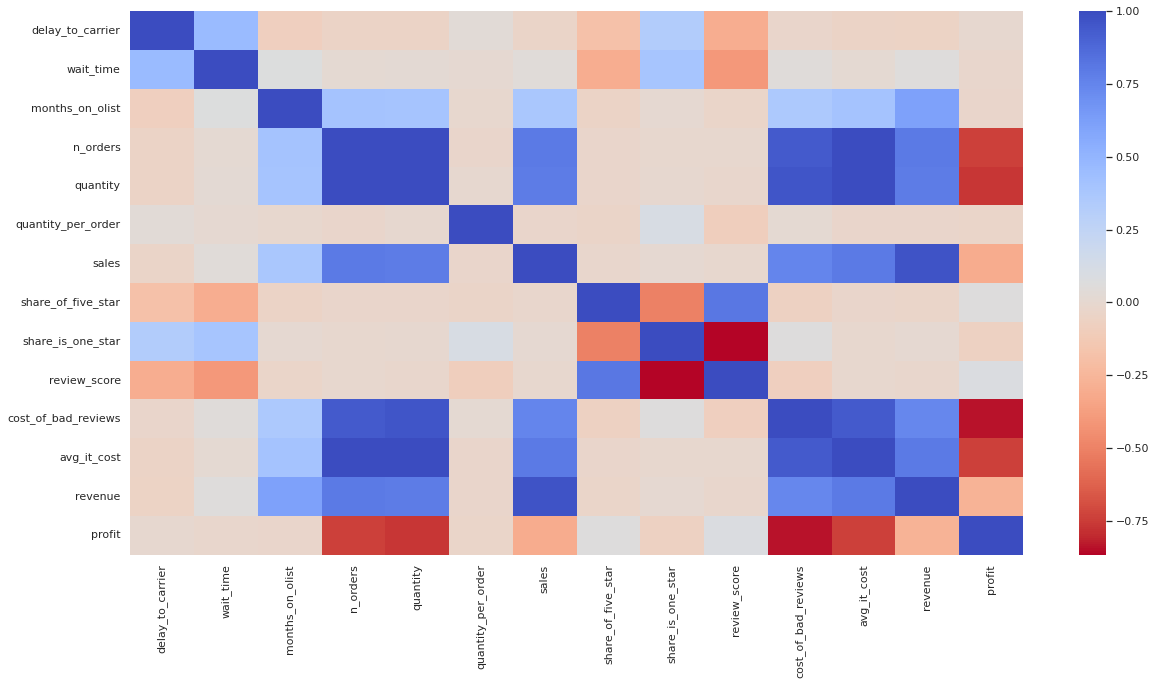

In [13]:
sns.heatmap(df.corr(), cmap='coolwarm_r', linecolor='w');

# Revenue Structure

Total net profit: 307157.0 
Total sellers: 2967


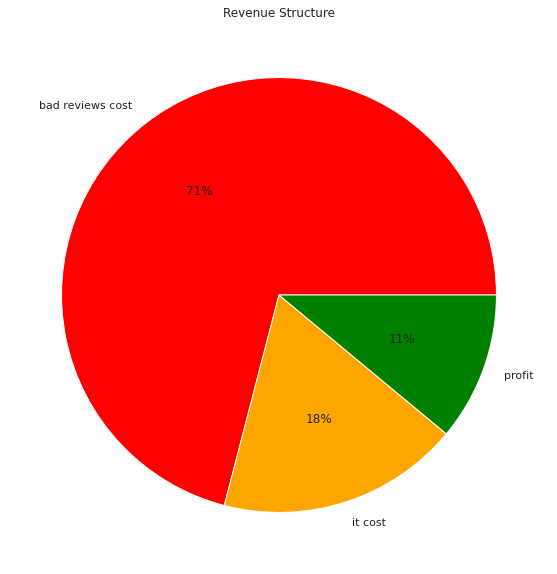

In [15]:
bad_cost = df.cost_of_bad_reviews.sum()
it_cost = df.avg_it_cost.sum()
profit = df.profit.sum()

plt.pie(x=[bad_cost, it_cost, profit], labels=['bad reviews cost', 'it cost', 'profit'], colors=['red','orange', 'green'], autopct='%.0f%%')
plt.title('Revenue Structure')

print(f'Total net profit: {profit.round()}', f'\nTotal sellers: {len(df)}')

# Our benchmark

Our benchmark is to improve the percentage profit reducing the bad reviews cost losing as minimum sellers as possible.

# 1st Solution

Deleting all the sellers with an avg review score less than 3.8 we improve our profit margin up to 21%. However, we delete around 800 sellers.

Total net profit: 452787.0 
Total sellers: 2197


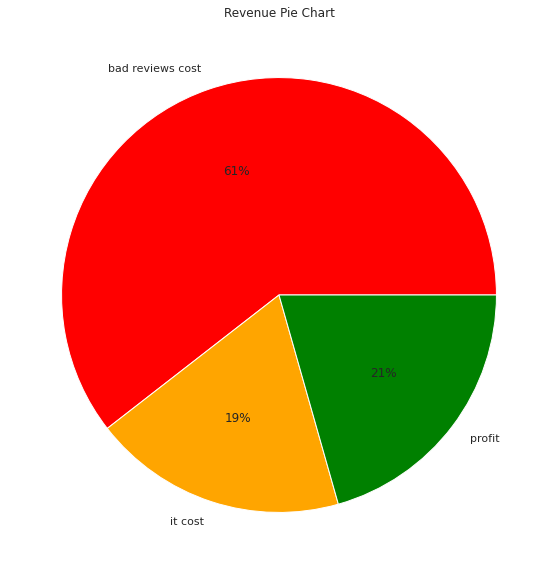

In [17]:
df2 = df[(df.review_score > 3.8)]

bad_cost = df2.cost_of_bad_reviews.sum()
it_cost = df2.avg_it_cost.sum()
profit = df2.profit.sum()

plt.pie(x=[bad_cost, it_cost, profit], labels=['bad reviews cost', 'it cost', 'profit'], colors=['red','orange', 'green'], autopct='%.0f%%')
plt.title('Revenue Pie Chart')

print(f'Total net profit: {profit.round()}', f'\nTotal sellers: {len(df2)}')


# 2nd Solution

The second solution we found it's just deleting the 10 worse performing sellers.

Total net profit: 561854.0 
Total sellers: 2957


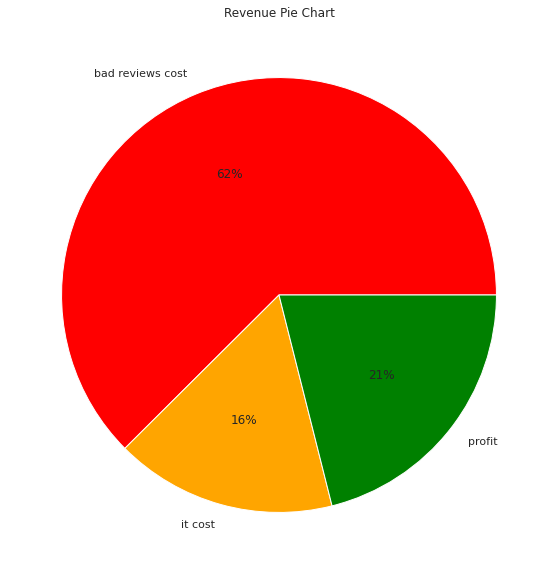

In [16]:
df3 = df.sort_values('profit')[10:]

bad_cost = df3.cost_of_bad_reviews.sum()
it_cost = df3.avg_it_cost.sum()
profit = df3.profit.sum()

plt.pie(x=[bad_cost, it_cost, profit], labels=['bad reviews cost', 'it cost', 'profit'], colors=['red','orange', 'green'], autopct='%.0f%%')
plt.title('Revenue Pie Chart')

print(f'Total net profit: {profit.round()}', f'\nTotal sellers: {len(df3)}')

In [1]:
!jupyter nbconvert --to slides --post serve ceo_presentation.ipynb

[NbConvertApp] Converting notebook ceo_presentation.ipynb to slides
[NbConvertApp] Writing 814630 bytes to ceo_presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/home/quantium/.local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/home/quantium/.local/lib/python3.8/site-packages/jupyter_core/application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/home/quantium/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 976, in launch_instance
    app.start()
  File "/home/quantium/.local/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 414, in start
    self.convert_notebooks()
  File "/home/quantium/.local/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 588, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/home/qua